In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier



from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from pathlib import Path
from sklearn import datasets, metrics, model_selection, svm
from sklearn.utils import resample
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [11]:
data = pd.read_csv(r"X:\Lab Members\Sung\SYSHIN0228\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT\Feature_Matrix_Prediction_6MWT.csv", sep=',')
data = data.dropna()

CM = np.zeros((2,2))

df = data.query('cut_off_time == 60')
# print(df)
# df.head()

df_feature = df[[
    # Demographics
    'Age', 'SexM0F1', 'Height', 'Weight',
#   # Clinical outcomes at admission
    'FIM_AD', 'BBS_AD', 'MWT10_SSV_AD', 'MWT6_AD', 'TUG_AD',
#     # Amount of motion
#     'AoM_Pel_tilt', 'AoM_Pel_oblq', 'AoM_Pel_ro', 'AoM_Pel_norm',
#     'AoM_Ankle_US_x', 'AoM_Ankle_US_y', 'AoM_Ankle_US_z', 'AoM_Ankle_US_norm',
#     'AoM_Ankle_AS_x', 'AoM_Ankle_AS_y', 'AoM_Ankle_AS_z', 'AoM_Ankle_AS_norm',
#     # Signal characteristics of Gyroscope
#     'SC_Gyr_norm_mean', 'DLS_R_Gyr_norm_mean', 'DLS_L_Gyr_norm_mean',
#     'SC_Gyr_norm_range', 'DLS_R_Gyr_norm_range', 'DLS_L_Gyr_norm_range',
#     'SC_Gyr_norm_rms', 'DLS_R_Gyr_norm_rms', 'DLS_L_Gyr_norm_rms',
#     'SC_Gyr_norm_std', 'DLS_R_Gyr_norm_std', 'DLS_L_Gyr_norm_std',
#     'SC_Gyr_norm_skew', 'DLS_R_Gyr_norm_skew', 'DLS_L_Gyr_norm_skew',
#     'SC_Gyr_norm_kurtosis', 'DLS_R_Gyr_norm_kurtosis', 'DLS_L_Gyr_norm_kurtosis',
#     'SC_Gyr_norm_SamEn', 'DLS_R_Gyr_norm_SamEn', 'DLS_L_Gyr_norm_SamEn',
#     # Signal characteristics of acceleration
#     'SC_Acc_norm_mean', 'DLS_R_Acc_norm_mean', 'DLS_L_Acc_norm_mean',
#     'SC_Acc_norm_range', 'DLS_R_Acc_norm_range', 'DLS_L_Acc_norm_range',
#     'SC_Acc_norm_rms', 'DLS_R_Acc_norm_rms', 'DLS_L_Acc_norm_rms',
#     'SC_Acc_norm_std', 'DLS_R_Acc_norm_std', 'DLS_L_Acc_norm_std',
#     'SC_Acc_norm_skew', 'DLS_R_Acc_norm_skew', 'DLS_L_Acc_norm_skew',
#     'SC_Acc_norm_kurtosis', 'DLS_R_Acc_norm_kurtosis', 'DLS_L_Acc_norm_kurtosis',
#     'SC_Acc_norm_SamEn', 'DLS_R_Acc_norm_SamEn', 'DLS_L_Acc_norm_SamEn'
            ]]

X = df_feature.values

# To combine Moderate and Mild at Admission
k = 0
for i in df['Ambul_AD']:
    if i == 'Moderate':
        df['Ambul_AD'].values[k] = 'Mild'
    k+=1

# To combine Moderate and Mild at Discharge
k = 0
for i in df['Ambul_DC']:
    if i == 'Moderate':
        df['Ambul_DC'].values[k] = 'Mild'

#         print('ID', k+1, ', AD: ', df['Ambul_AD'].values[k], ', DC: ', df['Ambul_DC'].values[k])
    k+=1

factor = pd.factorize(df['Ambul_DC'])
df.Ambul_DC = factor[0]
definitions = factor[1]
#         print(df.Ambul_DC)

# Normalize features
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
y = df['Ambul_DC'].values

# print(X_scale)
# print(y)

# Leave-one-subject-out cross validation
loo = LeaveOneOut()
loo.get_n_splits(X)

i = 0
y_test_ = np.zeros((len(y)))
y_pred_ = np.zeros((len(y)))
y_probs_ = np.zeros((len(y),2))

correct = 0
incorrect = 0
for train_index, test_index in loo.split(X):
#         print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_scale[train_index], X_scale[test_index]
    y_train, y_test = y[train_index], y[test_index]

#   # Machine learning models
#     clf = AdaBoostClassifier(random_state=123)
#     clf = BaggingClassifier(random_state=123)
#     clf = BalancedBaggingClassifier(random_state=123)
#     clf = RandomForestClassifier(n_estimators=100)
#     clf = BalancedRandomForestClassifier(n_estimators=100, random_state=123, bootstrap=False)
    clf = RUSBoostClassifier(random_state=123)

    
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)

    y_test_[i] = y_test
    y_pred_[i] = y_pred
    y_probs_[i] = clf.predict_proba(X_test)

    reversefactor = dict(zip(range(2),definitions))
    y_test = np.vectorize(reversefactor.get)(y_test)
    y_pred = np.vectorize(reversefactor.get)(y_pred)  
    

    

    print(y_pred)
    print(y_test)

    if y_test == ['Mild'] and y_pred == ['Mild']:
        CM[0][0] += 1
    elif y_test == ['Mild'] and y_pred == ['Severe']:
        CM[0][1] += 1
    elif y_test == ['Severe'] and y_pred == ['Severe']:
        CM[1][1] += 1
    elif y_test == ['Severe'] and y_pred == ['Mild']:
        CM[1][0] += 1

    print(CM)


    if y_test == y_pred:
        correct = correct + 1
    else:
        incorrect = incorrect + 1

    i = i+1
    print("Iteration:", i)  

print("Correct: ", correct)
print("Incorrect: ", incorrect)

target_names = ['Mild', 'Severe']    
print(confusion_matrix(y_test_,y_pred_))
print(classification_report(y_test_,y_pred_, target_names = target_names))

fpr, tpr, threshold = metrics.roc_curve(y_test_, y_probs_[:,1])
roc_auc = metrics.auc(fpr, tpr)

y_test_ = np.vectorize(reversefactor.get)(y_test_)
y_pred_ = np.vectorize(reversefactor.get)(y_pred_)  

    

['Mild']
['Mild']
[[1. 0.]
 [0. 0.]]
Iteration: 1
['Severe']
['Mild']
[[1. 1.]
 [0. 0.]]
Iteration: 2
['Severe']
['Mild']
[[1. 2.]
 [0. 0.]]
Iteration: 3
['Mild']
['Mild']
[[2. 2.]
 [0. 0.]]
Iteration: 4
['Mild']
['Mild']
[[3. 2.]
 [0. 0.]]
Iteration: 5
['Severe']
['Severe']
[[3. 2.]
 [0. 1.]]
Iteration: 6
['Mild']
['Mild']
[[4. 2.]
 [0. 1.]]
Iteration: 7
['Mild']
['Mild']
[[5. 2.]
 [0. 1.]]
Iteration: 8
['Mild']
['Mild']
[[6. 2.]
 [0. 1.]]
Iteration: 9
['Mild']
['Mild']
[[7. 2.]
 [0. 1.]]
Iteration: 10
['Mild']
['Severe']
[[7. 2.]
 [1. 1.]]
Iteration: 11
['Mild']
['Mild']
[[8. 2.]
 [1. 1.]]
Iteration: 12
['Mild']
['Mild']
[[9. 2.]
 [1. 1.]]
Iteration: 13
['Mild']
['Mild']
[[10.  2.]
 [ 1.  1.]]
Iteration: 14
['Mild']
['Mild']
[[11.  2.]
 [ 1.  1.]]
Iteration: 15
['Mild']
['Mild']
[[12.  2.]
 [ 1.  1.]]
Iteration: 16
['Severe']
['Severe']
[[12.  2.]
 [ 1.  2.]]
Iteration: 17
['Mild']
['Severe']
[[12.  2.]
 [ 2.  2.]]
Iteration: 18
['Mild']
['Severe']
[[12.  2.]
 [ 3.  2.]]
Iteration: 1

In [43]:
print('y_AD_Ture: ', df['Ambul_AD'].values)
print('y_DC_True: ', y_test_)
print('y_DC_Pred: ', y_pred_)

Ambul_save = pd.DataFrame({'Ambul_AD_True': df['Ambul_AD'].values, 'Ambul_DC_True': y_test_, 'Ambul_DC_Pred': y_pred_})
SAVEPATH = Path(r"X:\Lab Members\Sung\SYSHIN0228\RERC_STARS_Sensor_Analysis\Machine_Learning_6MWT")
# Ambul_save.to_csv(SAVEPATH/'Ambul_CO_Only_BBC.csv', index=False) 


y_AD_Ture:  ['Mild' 'Severe' 'Severe' 'Mild' 'Mild' 'Severe' 'Mild' 'Mild' 'Mild'
 'Mild' 'Severe' 'Mild' 'Mild' 'Mild' 'Severe' 'Mild' 'Severe' 'Severe'
 'Severe' 'Mild' 'Mild' 'Severe' 'Mild' 'Severe' 'Severe' 'Mild' 'Severe'
 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Severe' 'Severe'
 'Severe' 'Severe' 'Mild' 'Mild' 'Mild']
y_DC_True:  ['Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Severe' 'Mild' 'Mild' 'Mild' 'Mild'
 'Severe' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Severe' 'Severe' 'Severe'
 'Mild' 'Mild' 'Mild' 'Mild' 'Severe' 'Mild' 'Mild' 'Severe' 'Mild' 'Mild'
 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Severe' 'Severe' 'Mild' 'Severe'
 'Mild' 'Mild' 'Mild']
y_DC_Pred:  ['Mild' 'Severe' 'Severe' 'Mild' 'Mild' 'Severe' 'Mild' 'Mild' 'Mild'
 'Mild' 'Severe' 'Mild' 'Mild' 'Mild' 'Severe' 'Mild' 'Severe' 'Severe'
 'Severe' 'Mild' 'Mild' 'Severe' 'Mild' 'Severe' 'Severe' 'Mild' 'Mild'
 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Mild' 'Severe' 'Severe'
 'Severe' 'Severe' 'Mild' 'Mild' 'Mild']


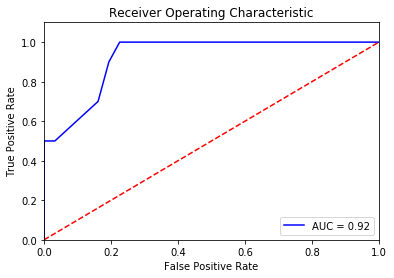

0.9241935483870968


In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc)


In [49]:
feature_importance = pd.DataFrame({'Feature': df_feature.columns,
                                   'Importance': clf.feature_importances_})
feature_importance.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
18,DLS_L_Gyr_norm_skew,0.123344
21,DLS_L_Gyr_norm_kurtosis,0.114224
5,DLS_R_Gyr_norm_mean,0.095113
22,SC_Gyr_norm_SamEn,0.087923
6,DLS_L_Gyr_norm_mean,0.079890
12,DLS_L_Gyr_norm_rms,0.068602
23,DLS_R_Gyr_norm_SamEn,0.066411
17,DLS_R_Gyr_norm_skew,0.063526
24,DLS_L_Gyr_norm_SamEn,0.055903
11,DLS_R_Gyr_norm_rms,0.050489
